In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Data preprocessing 

In [2]:
df=pd.read_csv("diamonds.csv",encoding="utf_8")

In [3]:
df.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.shape

(53940, 11)

In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.drop(df[["Unnamed: 0"]],axis=1,inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001323D53A730>,
      dtype=object)

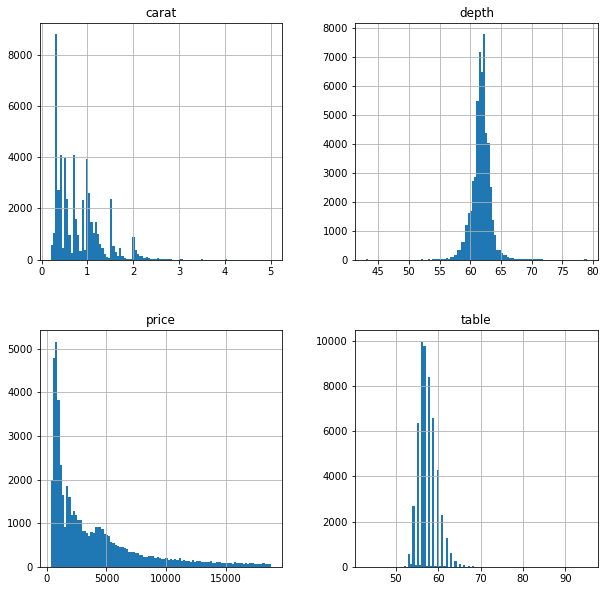

In [13]:
df.hist(column=["price",'carat','depth','table'],figsize=(10,10),bins=100)

### ordinal encoding using apply method

In [14]:
def order_encoder (df):
    color = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
    for i in color.keys():
        if  df==i:
            df=color[i]
    return df

In [15]:
df["color_encoded"]=df["color"].apply(order_encoder)

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


### ordinal encoding using functional programming 

In [17]:
color=[]
for i in df["color"]:
    color.append(i)
color_order= {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
color_encoded=[]
for i in color:
    if i in color_order.keys():
        color_encoded.append(color_order[i])
df["color_encoded"]=pd.DataFrame(color_encoded)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


### Ordinal encoding using map method

In [18]:
color = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
df["color_encoded"]=df.color.map(color)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


At the end we will use map method because it's more easy to use 

In [19]:
# encoding cut feature 
cut_order={"Ideal":5,"Premium":4,"Very Good":3,"Good":3,"Fair":1}
df["cut_encoded"]=df.cut.map(cut_order)

In [20]:
df[df["cut"]=="Very Good"]

,carat,cut,color,clarity,depth,table,price,x,y,z,color_encoded,cut_encoded
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1,3
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2,3
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,3,3
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3,3
19,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
53921,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53,6,3
53922,0.70,Very Good,D,VS1,63.1,59.0,2755,5.67,5.58,3.55,7,3
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47,6,3
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49,6,3


In [21]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [22]:
# encoding clarity feature 
clarity_encoded={"SI1":3,
"VS2":4,
"SI2":2,
"VS1":5,
"VVS2":6,
"VVS1":7,    
"IF":8,      
"I1":1}
df["clarity_encoded"]=df.clarity.map(clarity_encoded)

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_encoded,cut_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6,5,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6,4,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6,3,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2,4,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,3,2


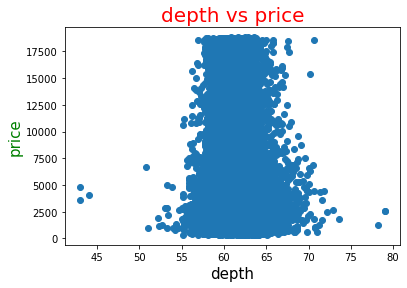

In [24]:
# exploring data 
# finding the relation between every feature and target :
#depth vs price
plt.scatter(df["depth"],df["price"])
plt.title("depth vs price",fontsize=20,color="r")
plt.xlabel("depth",fontsize=15,color="k")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

from the shape we can say that between 55 and 70% of diamond diameter there are all price range no percentage is better than the other one 

In [25]:
corr=df["depth"].corr(df["price"])
print(corr)

-0.010647404584142985


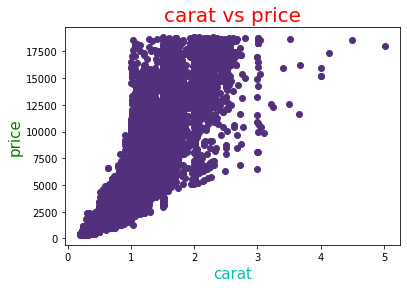

In [26]:
# finding the relation between every feature and target :
#carat vs price
plt.scatter(df["carat"],df["price"],color="#52307c")
plt.title("carat vs price",fontsize=20,color="r")
plt.xlabel("carat",fontsize=15,color="c")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

From the graph we can say that carat is highly correlated with target (price)

In [27]:
corr=df["carat"].corr(df["price"])
print(corr)

0.921591301193476


using correlation function we prove it 

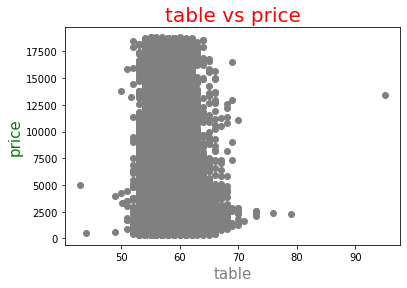

In [28]:
#table vs price
plt.scatter(df["table"],df["price"],color="#808080")
plt.title("table vs price",fontsize=20,color="r")
plt.xlabel("table",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

From gragh we can tell that table values is between 53 and 68 and we can considered the other points as outliers 

In [29]:
corr=df["table"].corr(df["price"])
print(corr)

0.12713390212174205


unfortunately the table is poorly correlated with target value 

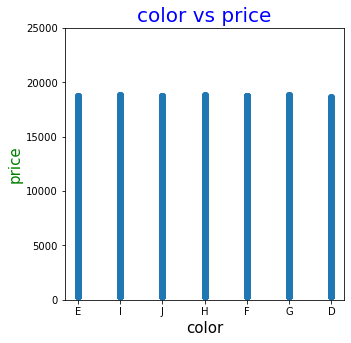

In [30]:
# finding the relation between every feature and target :
#color vs price
plt.figure(figsize=(5, 5))
plt.scatter(df["color"],df["price"])
plt.title("color vs price",fontsize=20,color="b")
plt.xlabel("color",fontsize=15,color="k")
plt.ylabel("price",fontsize=15,color="g")
plt.ylim([0, 25000])

plt.show()

gragh tells us that color isn't an omportant factor for this diamonds to estimate their prices because we can say that for every color the price range is very high 

In [31]:
corr=df["color_encoded"].corr(df["price"])
print(corr)

-0.17251092815346733


unfortunately the table is poorly correlated with target value

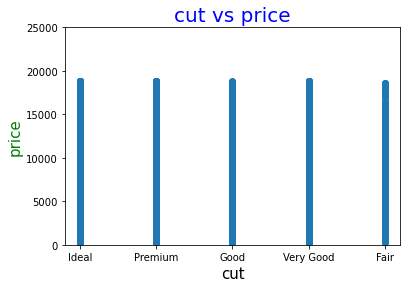

In [32]:
#color vs price
plt.scatter(df["cut"],df["price"])
plt.title("cut vs price",fontsize=20,color="b")
plt.xlabel("cut",fontsize=15,color="k")
plt.ylabel("price",fontsize=15,color="g")
plt.ylim([0, 25000])
plt.show()

In [33]:
corr=df["cut_encoded"].corr(df["price"])
print(corr)

-0.060329200950366056


gragh tells us that cut type isn't an omportant factor for this diamonds to estimate their prices because we can say that for every cut type the price range is very high
unfortunately the table is poorly correlated with target value

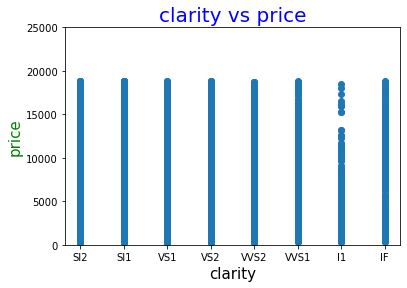

In [34]:
#clarity vs price
plt.scatter(df["clarity"],df["price"])
plt.title("clarity vs price",fontsize=20,color="b")
plt.xlabel("clarity",fontsize=15,color="k")
plt.ylabel("price",fontsize=15,color="g")
plt.ylim([0, 25000])
plt.show()

In [35]:
corr=df["clarity_encoded"].corr(df["price"])
print(corr)

-0.1468000710789499


gragh tells us that clarity isn't an omportant factor for this diamonds to estimate their prices because we can say that for every clarity type the price range is very high 
unfortunately the table is poorly correlated with target value

### Trying to fix outliers 

In [36]:
df_filterd=df[df["table"]>53]
df_filterd=df_filterd[df["table"]<68]

<ipython-input-36-dff8bd5d9557>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filterd=df_filterd[df["table"]<68]


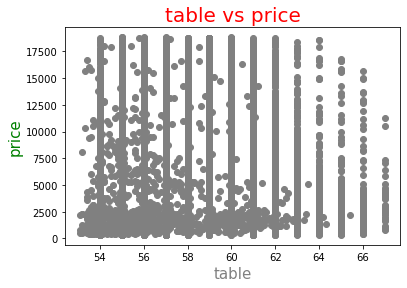

In [37]:
plt.scatter(df_filterd["table"],df_filterd["price"],color="#808080")
plt.title("table vs price",fontsize=20,color="r")
plt.xlabel("table",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [38]:
corr=df_filterd["table"].corr(df_filterd["price"])
print(corr)

0.1289783955914333


In [39]:
df_filterd=df_filterd[df["depth"]>55]
df_filterd=df_filterd[df["depth"]<68]

<ipython-input-39-c79ca1949d52>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filterd=df_filterd[df["depth"]>55]
<ipython-input-39-c79ca1949d52>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filterd=df_filterd[df["depth"]<68]


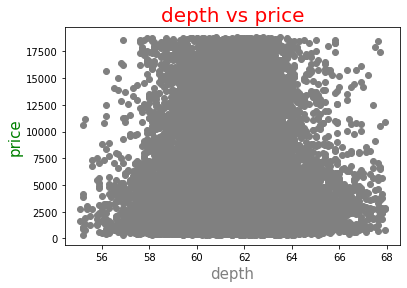

In [40]:
plt.scatter(df_filterd["depth"],df_filterd["price"],color="#808080")
plt.title("depth vs price",fontsize=20,color="r")
plt.xlabel("depth",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [41]:
corr=df_filterd["depth"].corr(df_filterd["price"])
print(corr)

-0.011433526473196324


After fixing outliers there are still many features that poorly correlated with feature 

### X,Y,Z preprocessing 

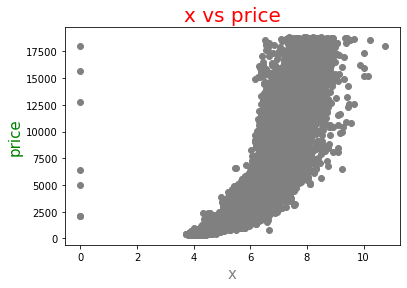

In [42]:
plt.scatter(df_filterd["x"],df_filterd["price"],color="#808080")
plt.title("x vs price",fontsize=20,color="r")
plt.xlabel("x",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [43]:
corr=df_filterd["x"].corr(df_filterd["price"])
print(corr)

0.8849714707675053


In [44]:
df_filterd=df_filterd[df_filterd["x"]>3]


In [45]:
df_filterd=df_filterd[df_filterd["x"]<9]

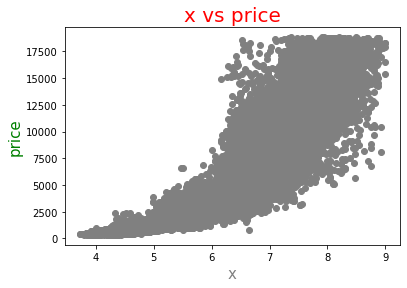

In [46]:
plt.scatter(df_filterd["x"],df_filterd["price"],color="#808080")
plt.title("x vs price",fontsize=20,color="r")
plt.xlabel("x",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

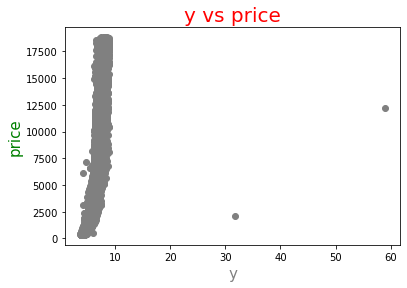

In [47]:
plt.scatter(df_filterd["y"],df_filterd["price"],color="#808080")
plt.title("y vs price",fontsize=20,color="r")
plt.xlabel("y",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [48]:
df_filterd=df_filterd[df_filterd["y"]<10]

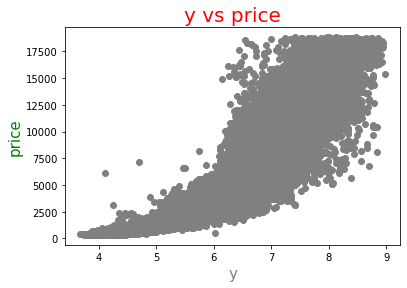

In [49]:
plt.scatter(df_filterd["y"],df_filterd["price"],color="#808080")
plt.title("y vs price",fontsize=20,color="r")
plt.xlabel("y",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [50]:
corr=df_filterd["y"].corr(df_filterd["price"])
print(corr)

0.8886919536549225


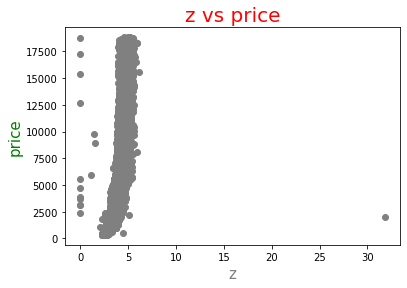

In [51]:
plt.scatter(df_filterd["z"],df_filterd["price"],color="#808080")
plt.title("z vs price",fontsize=20,color="r")
plt.xlabel("z",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [52]:
df_filterd=df_filterd[df_filterd["z"]>2]
df_filterd=df_filterd[df_filterd["z"]<7]

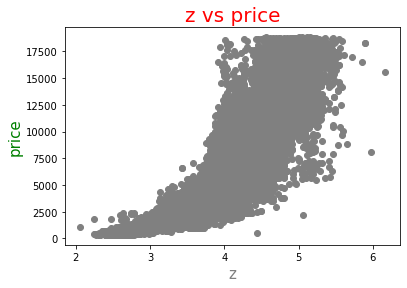

In [53]:
plt.scatter(df_filterd["z"],df_filterd["price"],color="#808080")
plt.title("z vs price",fontsize=20,color="r")
plt.xlabel("z",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [54]:
df_filterd=df_filterd[df_filterd["z"]<5.8]

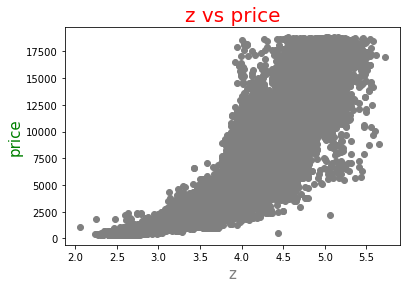

In [55]:
plt.scatter(df_filterd["z"],df_filterd["price"],color="#808080")
plt.title("z vs price",fontsize=20,color="r")
plt.xlabel("z",fontsize=15,color="#808080")
plt.ylabel("price",fontsize=15,color="g")
plt.show()

In [56]:
corr=df_filterd["z"].corr(df_filterd["price"])
print(corr)

0.8832522475293593


X,Y,Z is highly crrelated with target variable 

In [57]:
df_filterd.shape

(53069, 13)

after cleaning data and detecting outliears we reduse data to 53069 row instead of 53940 row

### Features selections 

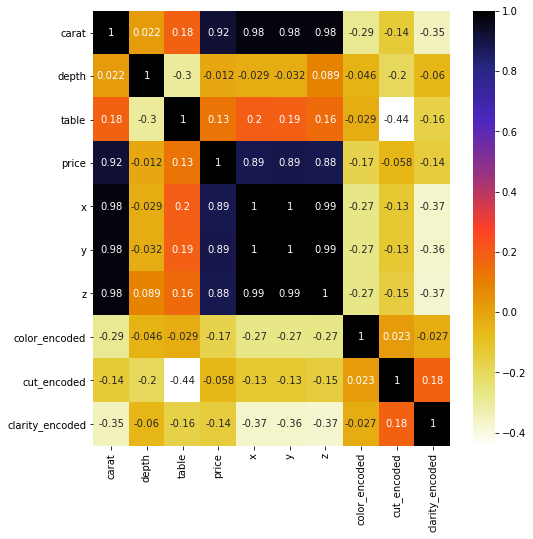

In [58]:
# correlation between features 
import seaborn as sns
plt.figure(figsize=(8,8))
cor=df_filterd.drop(["cut","color","clarity"],axis=1).corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

we can say that x,y,z and carat are highly correlated with each other and with target variable price but ther features are poorly correlated with target value we will drop x,y,z features to avoid collapsing space which make the linear regression model is unsolvable or lead to overfitting data  

In [59]:
from sklearn.preprocessing import MinMaxScaler 
scaling=MinMaxScaler()
x=scaling.fit_transform(df_filterd.drop(["cut","color","clarity","price","x","y","z"],axis=1))
y=scaling.fit_transform(df_filterd[["price"]])

In [60]:
df_filterd[["price"]].shape

(53069, 1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)


0.9100571812629721

In [62]:
reg.score(X_test,y_test)

0.9081118927359596

### Cross validation 

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
scores=cross_val_score(reg,x,y,cv=cv)
scores

array([0.90929153, 0.90922807, 0.90778142, 0.90912176, 0.91161268])

In [64]:
print("The linear regression model has an average r-square score of %0.2f with standard deviation of %0.2f"%(scores.mean(),scores.std()))

The linear regression model has an average r-square score of 0.91 with standard deviation of 0.00


### Decision Tree Algorithm

In [66]:
from sklearn.ensemble import RandomForestRegressor
# initialize
model =RandomForestRegressor(n_estimators = 100, criterion = 'mse')
model.fit(X_train,y_train)
model.score(X_test,y_test)

<ipython-input-66-4b35d25228c2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


0.9815118441503164

In [67]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
scores=cross_val_score(model,x,y,cv=cv)
scores

C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

array([0.98247385, 0.98114077, 0.9813653 , 0.98240064, 0.98107052])

In [69]:
print("The  Decision tree has an average  score of %0.2f with standard deviation of %0.2f"%(scores.mean(),scores.std()))

The  Decision tree has an average  score of 0.98 with standard deviation of 0.00


We can say that decision tree algorithm is mre accurate than linear regression 

### KNN regressor 

In [70]:
from sklearn.neighbors import KNeighborsRegressor 

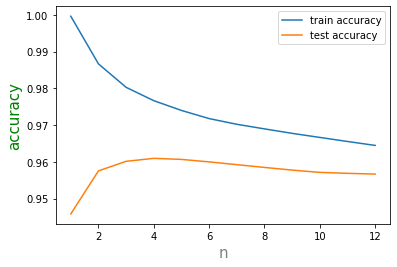

In [84]:
n=[]
train_accuracy=[]
test_accuracy=[]
for i in range(1,len(df_filterd.columns)):
    n.append(i)
    neigh=KNeighborsRegressor(n_neighbors=i)
    tr=neigh.fit(X_train,y_train)
    ts=neigh.score(X_train,y_train)
    train_accuracy.append(ts)
    tt=neigh.score(X_test,y_test)
    test_accuracy.append(tt)
plt.plot(n,train_accuracy)
plt.xlabel("n",fontsize=15,color="#808080")
plt.ylabel("tain accuracy",fontsize=15,color="r")
plt.plot(n,test_accuracy)
plt.xlabel("n",fontsize=15,color="#808080")
plt.ylabel("accuracy",fontsize=15,color="g")
plt.legend(["train accuracy","test accuracy"])
plt.show()


12

from graph we can tell that at n=3 we get the best train vs test accuracy 

In [86]:
print(train_accuracy[2],test_accuracy[3])

0.9802636438741816 0.9609605412735837


In [89]:
neigh=KNeighborsRegressor(n_neighbors=3)
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
scores=cross_val_score(neigh,x,y,cv=cv)
scores

array([0.96115675, 0.961478  , 0.96106266, 0.95989168, 0.96059113])

In [90]:
print("The  KNN regressor with 3 neigbors has an average  score of %0.2f with standard deviation of %0.2f"%(scores.mean(),scores.std()))

The  KNN regressor with 3 neigbors has an average  score of 0.96 with standard deviation of 0.00


### Ranking algorethmis used 
1. Decision tree with overall accuracy of 98% 
2. KNN regressor with n =3 with overall accuracy of 96% 
3. Linear regression with overall accuracy of 91% 